# K-Means Clustering with Scikit-Learn

This notebook demonstrates unsupervised clustering using the K-Means algorithm from scikit-learn on a synthetic customer segmentation dataset.

## 1. Introduction
We will generate a synthetic dataset simulating customer features and apply K-Means clustering to segment them.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 3. Generate Synthetic Data

In [2]:
# Generate data with 4 centers
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df.head()

,Feature_1,Feature_2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


## 4. Elbow Method to Determine k

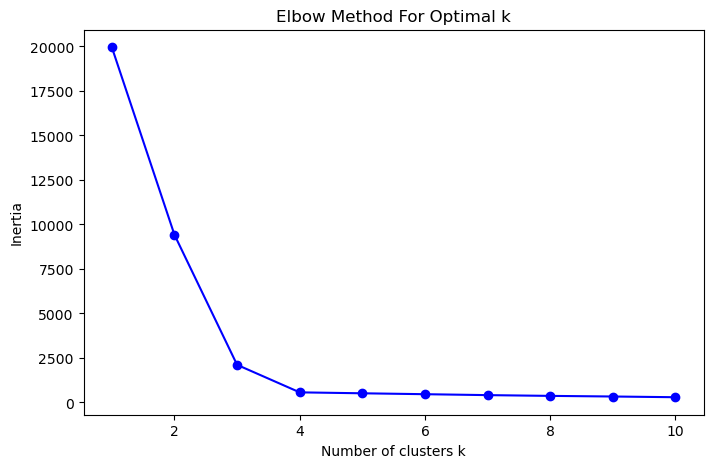

In [3]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## 5. Apply K-Means Clustering

In [4]:
# From elbow plot, choose k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters
df.head()

,Feature_1,Feature_2,Cluster
0,-9.297689,6.473679,1
1,-9.698741,6.938967,1
2,-1.686653,7.793442,3
3,-7.097308,-5.781333,2
4,-10.876452,6.315437,1


## 6. Visualize Clusters

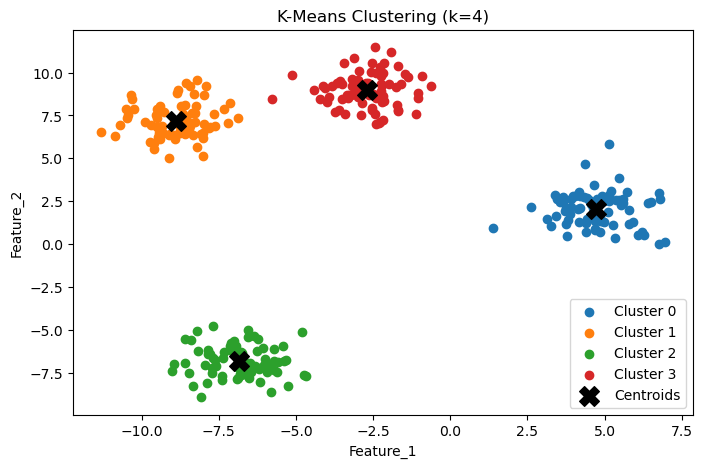

In [5]:
plt.figure(figsize=(8, 5))
for cluster in np.unique(clusters):
    plt.scatter(
        df[df['Cluster'] == cluster]['Feature_1'],
        df[df['Cluster'] == cluster]['Feature_2'],
        label=f'Cluster {cluster}'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('K-Means Clustering (k=4)')
plt.legend()
plt.show()

## 7. Silhouette Score

In [6]:
score = silhouette_score(X, clusters)
print(f"Silhouette Score for k=4: {score:.3f}")

Silhouette Score for k=4: 0.792


## 8. Conclusion
K-Means effectively segmented the synthetic customers into 4 clusters. Use silhouette score and elbow method to validate cluster choices.